In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set(font_scale=2.5)

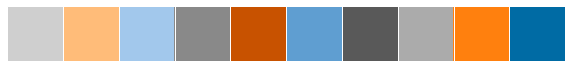

In [4]:
# using a color-blind friendly palette with 10 colors
color_blind_palette_10 = ['#cfcfcf', '#ffbc79', '#a2c8ec', '#898989', '#c85200',
                          '#5f9ed1', '#595959', '#ababab', '#ff800e', '#006ba4']

sns.palplot(color_blind_palette_10)

# Load background data

## Movie info

In [5]:
top_n_movie_ratings = pd.read_csv('data/top-n-movies_user-ratings.csv').drop(columns='Unnamed: 0')

In [6]:
top_n_movie_ratings.head()

,user_id,movie_id,rating,movie_title
0,307,0,4,Toy Story
1,250,99,4,Fargo
2,24,180,5,Return of the Jedi
3,19,287,1,Scream
4,31,293,3,Liar Liar


In [7]:
# create a dictionary between movie_id and movie_title (since the results output doesn't have titles)
movie_titles = top_n_movie_ratings.groupby(['movie_id','movie_title']).size().to_frame() \
                                    .reset_index('movie_title').movie_title \
                                    .to_dict()
movie_titles

{0: 'Toy Story',
 49: 'Star Wars',
 99: 'Fargo',
 120: 'Independence Day',
 180: 'Return of the Jedi',
 257: 'Contact',
 285: 'English Patient, The',
 287: 'Scream',
 293: 'Liar Liar',
 299: 'Air Force One'}

### Create a dictionary to map these movies to colors for plots

In [8]:
color_map = dict(zip(top_n_movie_ratings.movie_title.sort_values().unique().tolist(), color_blind_palette_10))
color_map

{'Air Force One': '#cfcfcf',
 'Contact': '#ffbc79',
 'English Patient, The': '#a2c8ec',
 'Fargo': '#898989',
 'Independence Day': '#c85200',
 'Liar Liar': '#5f9ed1',
 'Return of the Jedi': '#595959',
 'Scream': '#ababab',
 'Star Wars': '#ff800e',
 'Toy Story': '#006ba4'}

# Load the results from the simulations

## A/B Test Output

In [9]:
ab_test_1k = pd.read_csv('output/ab_test_1k.csv').drop(columns='Unnamed: 0')

In [10]:
ab_test_1k.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,1.000000,120,0,1,1,0,12
1,0.500000,299,0,0,1,1,783
2,0.666667,49,0,1,2,2,649
3,0.750000,49,0,1,3,3,837
4,0.800000,49,0,1,4,4,483


In [11]:
ab_test_5k = pd.read_csv('output/ab_test_5k.csv').drop(columns='Unnamed: 0')

In [12]:
ab_test_5k.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,1.000000,120,0,1,1,0,12
1,0.500000,299,0,0,1,1,783
2,0.666667,49,0,1,2,2,649
3,0.750000,49,0,1,3,3,837
4,0.800000,49,0,1,4,4,483


## $\epsilon$-Greedy Output

In [13]:
eps_greedy_05 = pd.read_csv('output/epsilon_greedy_05.csv').drop(columns='Unnamed: 0')

In [14]:
eps_greedy_05.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,0.0,0,0,0,0,0,12
1,0.0,257,0,0,0,1,58
2,0.0,0,0,0,0,2,222
3,0.0,0,0,0,0,3,830
4,0.2,0,0,1,1,4,313


In [15]:
eps_greedy_10 = pd.read_csv('output/epsilon_greedy_10.csv').drop(columns='Unnamed: 0')

In [16]:
eps_greedy_10.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,0.0,0,0,0,0,0,12
1,0.0,257,0,0,0,1,58
2,0.0,0,0,0,0,2,222
3,0.0,0,0,0,0,3,830
4,0.2,0,0,1,1,4,313


## Thompson Sampling Output

In [17]:
thompson = pd.read_csv('output/thompson_sampling.csv').drop(columns='Unnamed: 0')

In [18]:
thompson.head()

,fraction_relevant,item_id,iteration,reward,total_reward,visit,visitor_id
0,0.000000,299,0,0,0,0,12
1,0.500000,49,0,1,1,1,333
2,0.666667,49,0,1,2,2,693
3,0.500000,49,0,0,2,3,479
4,0.400000,120,0,0,2,4,525


### Let's visualize the Thompson Sampling output for a single run. We'll look at each movie's percentage of the total recommendations as the simulation progressed:

In [20]:
# create a dataframe with running totals of how many times each recommendation was taken
thompson_running_ttl = thompson.query('iteration == 0') \
                                .eval('selected = 1') \
                                .pivot(index='visit', columns='item_id', values='selected') \
                                .fillna(0) \
                                .cumsum(axis=0) \
                                .reset_index() \
                                .rename(columns=movie_titles)

In [21]:
# scale the value by the visit number to get turn the running total into a percentage
thompson_running_ttl.iloc[:,1:] = thompson_running_ttl.iloc[:,1:].div((thompson_running_ttl.visit + 1)/100, axis=0)

In [23]:
thompson_running_ttl.head()

movie_id,visit,Toy Story,Star Wars,Fargo,Independence Day,Return of the Jedi,Contact,"English Patient, The",Scream,Liar Liar,Air Force One
0,0,0.000000,0.000000,0.0,100.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,50.000000,0.000000,0.0,50.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2,33.333333,33.333333,0.0,33.333333,0.0,0.0,0.0,0.0,0.0,0.0
3,3,25.000000,25.000000,25.0,25.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,4,20.000000,20.000000,20.0,20.000000,0.0,0.0,20.0,0.0,0.0,0.0


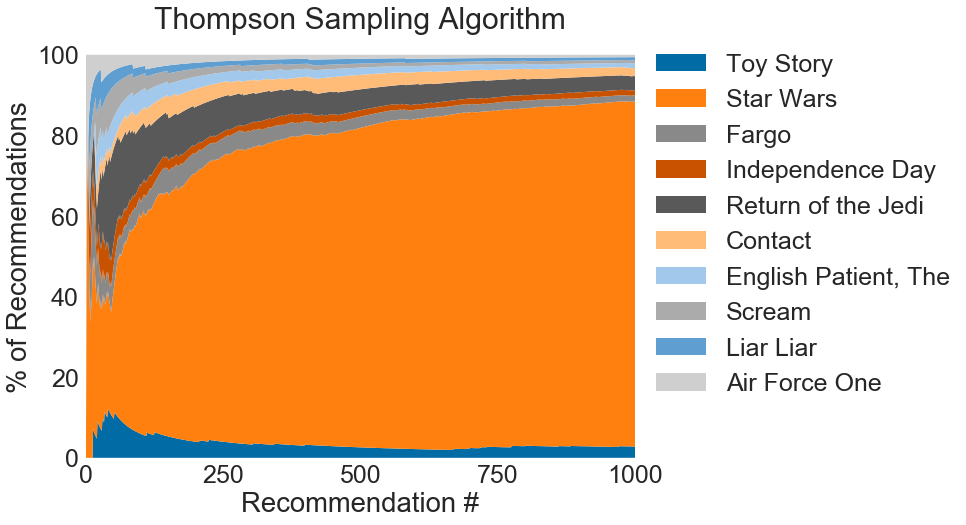

In [22]:
sns.set_palette(color_blind_palette_10)

fig, ax = plt.subplots(figsize=(10,8))

ax.stackplot(thompson_running_ttl.visit,
             thompson_running_ttl.iloc[:,1:11].T,
             labels=thompson_running_ttl.iloc[:,1:11].columns.values.tolist(),
             colors=[color_map[x] for x in thompson_running_ttl.iloc[:,1:].columns.values]
            )

ax.set_xlim(0,1000)
ax.set_xticks(range(0, 1100, 250))

ax.set_title('Thompson Sampling Algorithm')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recommendations')

lgd = plt.legend(bbox_to_anchor=(1.02, 0.98), loc=2, borderaxespad=0.)

ax.set_facecolor('w')

plt.tight_layout()
plt.show()

In [25]:
fig.savefig('output/images/bandit_results.png', transparent=False, bbox_extra_artists=(lgd,), bbox_inches='tight')

# Group the data to average over the runs

## A/B Test

In [23]:
ab_test_1k_avg = ab_test_1k.groupby('visit', as_index=False).mean()

In [24]:
ab_test_1k_avg.head()

,visit,fraction_relevant,item_id,iteration,reward,total_reward,visitor_id
0,0,0.400000,156.1,9.5,0.40,0.40,431.85
1,1,0.325000,172.4,9.5,0.25,0.65,470.55
2,2,0.333333,154.9,9.5,0.35,1.00,512.85
3,3,0.337500,181.4,9.5,0.35,1.35,424.95
4,4,0.320000,200.4,9.5,0.25,1.60,559.00


In [25]:
ab_test_5k_avg = ab_test_5k.groupby(['visit'], as_index=False).mean()

In [26]:
ab_test_5k_avg.head()

,visit,fraction_relevant,item_id,iteration,reward,total_reward,visitor_id
0,0,0.150,181.55,9.5,0.15,0.15,534.90
1,1,0.225,190.00,9.5,0.30,0.45,445.60
2,2,0.250,127.45,9.5,0.30,0.75,527.70
3,3,0.325,131.30,9.5,0.55,1.30,459.80
4,4,0.330,167.40,9.5,0.35,1.65,489.85


## $\epsilon$-Greedy

In [28]:
eps_greedy_05_avg = eps_greedy_05.groupby(['visit'], as_index=False).mean()

In [29]:
eps_greedy_05_avg.head()

,visit,fraction_relevant,item_id,iteration,reward,total_reward,visitor_id
0,0,0.200000,20.95,9.5,0.20,0.20,555.05
1,1,0.100000,12.85,9.5,0.00,0.20,576.85
2,2,0.183333,0.00,9.5,0.35,0.55,417.70
3,3,0.200000,16.80,9.5,0.25,0.80,466.30
4,4,0.220000,0.00,9.5,0.30,1.10,506.50


In [30]:
eps_greedy_10_avg = eps_greedy_10.groupby(['visit'], as_index=False).mean()

In [31]:
eps_greedy_10_avg.head()

,visit,fraction_relevant,item_id,iteration,reward,total_reward,visitor_id
0,0,0.200000,37.70,9.5,0.20,0.20,464.60
1,1,0.175000,47.15,9.5,0.15,0.35,363.45
2,2,0.216667,63.05,9.5,0.30,0.65,362.55
3,3,0.200000,48.10,9.5,0.15,0.80,558.55
4,4,0.230000,33.55,9.5,0.35,1.15,363.95


## Thompson Sampling

In [32]:
thompson_avg = thompson.groupby(['visit'], as_index=False).mean()

In [33]:
thompson_avg.head()

,visit,fraction_relevant,item_id,iteration,reward,total_reward,visitor_id
0,0,0.250000,212.85,9.5,0.25,0.25,402.80
1,1,0.425000,198.55,9.5,0.60,0.85,410.75
2,2,0.416667,199.05,9.5,0.40,1.25,489.05
3,3,0.387500,147.90,9.5,0.30,1.55,335.60
4,4,0.340000,141.15,9.5,0.15,1.70,443.55


## Let's summarize the results

#### We'll plot the percentage of recommendations that were "liked" (i.e., rated 5) by the users as a function of time (i.e., as more and more recommendations are made by each algorithm).

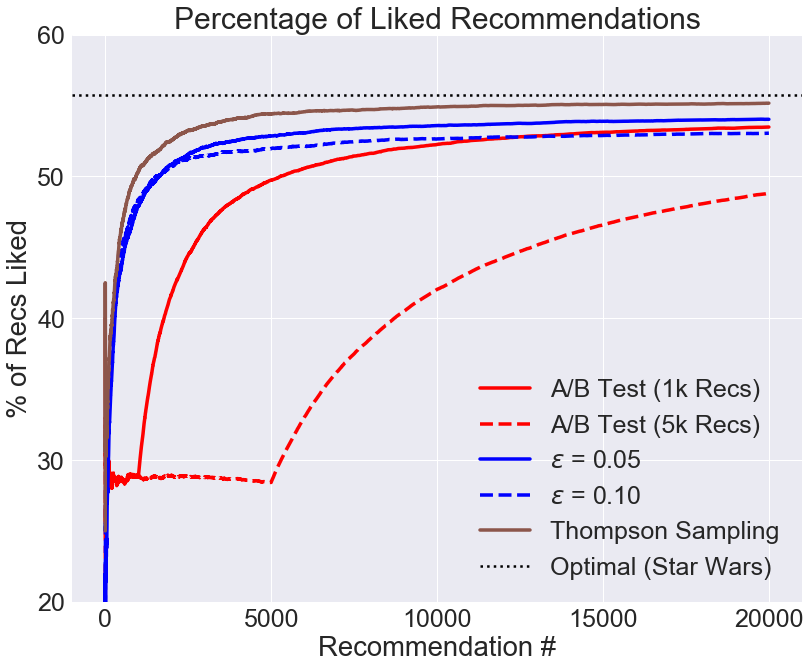

In [35]:
fig, ax = plt.subplots(figsize=(12,10))

for (avg_results_df, style) in [(ab_test_1k_avg, 'r-'),
                                (ab_test_5k_avg, 'r--'),
                                (eps_greedy_05_avg, 'b-'),
                                (eps_greedy_10_avg, 'b--'),
                                (thompson_avg, 'tab:brown')]:
    
    ax.plot(avg_results_df.visit, avg_results_df.fraction_relevant, style, linewidth=3.5)

# add a line for the optimal value -- 0.5575 for Star Wars (from exploration noteboook)
ax.axhline(y=0.5575, color='k', linestyle=':', linewidth=2.5)

ax.set_title('Percentage of Liked Recommendations')
ax.set_xlabel('Recommendation #')
ax.set_ylabel('% of Recs Liked')

ax.set_xticks(range(0,22000,5000))
ax.set_ylim(0.2, 0.6)
ax.set_yticks(np.arange(0.2, 0.7, 0.1))

# rescale the y-axis tick labels to show them as a percentage
ax.set_yticklabels((ax.get_yticks()*100).astype(int))

ax.legend(['A/B Test (1k Recs)',
           'A/B Test (5k Recs)',
           '$\epsilon$ = 0.05',
           '$\epsilon$ = 0.10',
           'Thompson Sampling',
           'Optimal (Star Wars)'
          ],
          loc='lower right'
         )

plt.tight_layout()
plt.show()

In [69]:
fig.savefig('output/images/pct_liked_recs.png', transparent=False)